In [1]:
from fastai2.basics import *
from fastai2.vision.all import *
from faststyle import *

In [2]:
mname = 'tn-village-1024_1'
learn = torch.load(f'exports/{mname}.pkl')

In [3]:
imgs_dir = Path('imgs')
save_dir = Path('preds')/mname; save_dir.mkdir(exist_ok=True)
fns = get_image_files(imgs_dir)
# fns = L(fns).map(lambda o: imgs_dir/o)

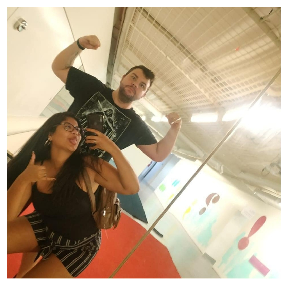

In [4]:
dset = Datasets(fns, tfms=[[PILImageX.create], [PILImage.create]])
show_at(dset, 0)

In [5]:
after_item = Pipeline([RatioResize(1024), ToTensor()])
after_batch = Pipeline(L(list(learn.dls.after_item)).filter(lambda o: not isinstance(o, RandTransform)))

In [6]:
with torch.no_grad():
  for item,fn in zip(dset,fns):
    dl = learn.dls.valid.new([item], after_item=after_item, bs=1)
    _,_,preds = learn.get_preds(dl=dl, with_decoded=True)
    img = PILImage.create(TensorImage((preds[0]*255).long()))
    img.save(save_dir/fn.name)